# PreProcessing

### read data

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data=pd.read_csv("../Data/fake_news_dataset.csv")

In [3]:
data.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,3/10/2023,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,5/25/2022,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,9/1/2022,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2/7/2023,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,4/3/2023,CNN,Austin Walker,Technology,fake


In [4]:
data["label"].value_counts()

label
fake    10056
real     9944
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

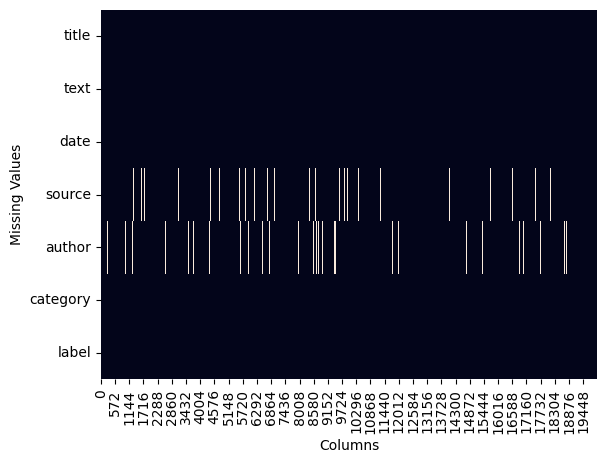

In [5]:
ax = plt.axes()
sns.heatmap(data.isna().transpose() , cbar=False , ax=ax)
plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.show

In [6]:
data.shape

(20000, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20000 non-null  object
 1   text      20000 non-null  object
 2   date      20000 non-null  object
 3   source    19000 non-null  object
 4   author    19000 non-null  object
 5   category  20000 non-null  object
 6   label     20000 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


### Cheak source    

In [8]:
data["source"].value_counts()

source
Daily News      2439
BBC             2393
The Guardian    2382
CNN             2375
NY Times        2372
Fox News        2362
Reuters         2360
Global Times    2317
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Real vs Fake per Source')

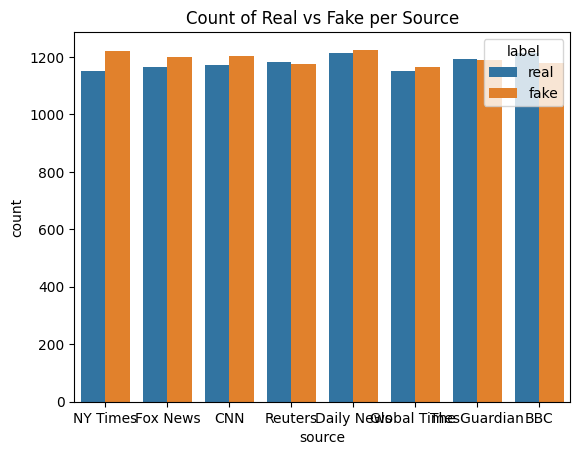

In [9]:
data["source"].value_counts()
sns.countplot(data=data, x="source", hue="label")
plt.title("Count of Real vs Fake per Source")

### Cheak author    

In [10]:
data["author"].value_counts()

author
Michael Smith          12
John Smith             11
Christopher Johnson     9
Lisa Williams           7
Jennifer Davis          7
                       ..
Tonya Anderson          1
Matthew Patton          1
Stephen Parks           1
Desiree Castro          1
Sherri Fry              1
Name: count, Length: 17051, dtype: int64

### Cheak category      

In [11]:
cate_count=data["category"].value_counts()

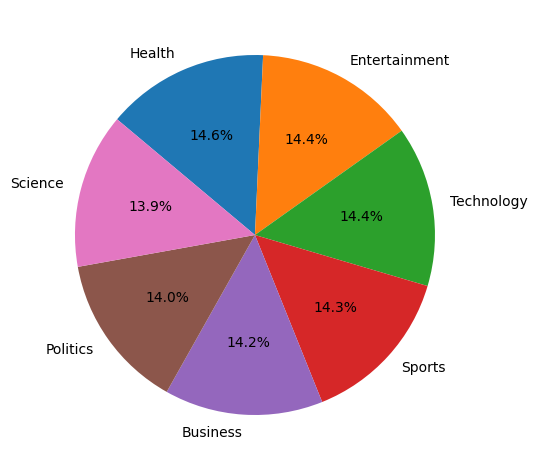

In [12]:
plt.pie(cate_count, labels=cate_count.index,
        autopct='%1.1f%%', startangle=140, counterclock=False)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Count of Real vs Fake per category')

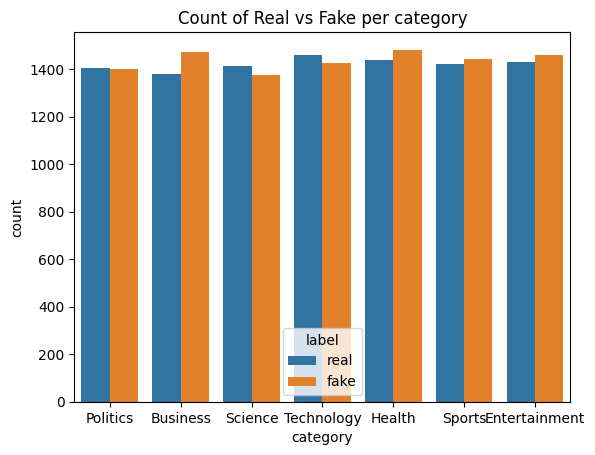

In [13]:
sns.countplot(data=data, x="category", hue="label")
plt.title("Count of Real vs Fake per category")

### Cheak date   

In [14]:
data["date"].value_counts()   

date
8/31/2023     32
12/20/2022    31
6/9/2024      30
3/4/2024      30
6/21/2022     30
              ..
1/7/2024       8
2/14/2023      8
4/4/2025       7
4/17/2023      7
8/11/2023      6
Name: count, Length: 1096, dtype: int64

In [15]:
data["date_2"] = pd.to_datetime(data["date"], errors='coerce')

In [16]:
data["years"] = data["date_2"].dt.year
data["months"] = data["date_2"].dt.month

In [17]:
data.head()

,title,text,date,source,author,category,label,date_2,years,months
0,Foreign Democrat final.,more tax development both store agreement lawy...,3/10/2023,NY Times,Paula George,Politics,real,2023-03-10,2023,3
1,To offer down resource great point.,probably guess western behind likely next inve...,5/25/2022,Fox News,Joseph Hill,Politics,fake,2022-05-25,2022,5
2,Himself church myself carry.,them identify forward present success risk sev...,9/1/2022,CNN,Julia Robinson,Business,fake,2022-09-01,2022,9
3,You unit its should.,phone which item yard Republican safe where po...,2/7/2023,Reuters,Mr. David Foster DDS,Science,fake,2023-02-07,2023,2
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,4/3/2023,CNN,Austin Walker,Technology,fake,2023-04-03,2023,4


In [18]:
data["years"].value_counts()

years
2023    6696
2024    6685
2022    4555
2025    2064
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Real vs Fake per Source')

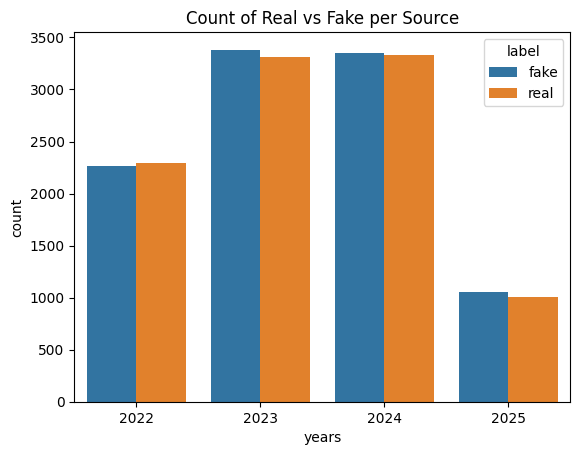

In [19]:
sns.countplot(data=data, x="years", hue="label")
plt.title("Count of Real vs Fake per Source")

In [20]:
data["months"].value_counts()

months
11    1768
1     1729
8     1700
7     1699
12    1697
10    1696
3     1685
5     1669
4     1614
6     1607
2     1580
9     1556
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Real vs Fake per Source')

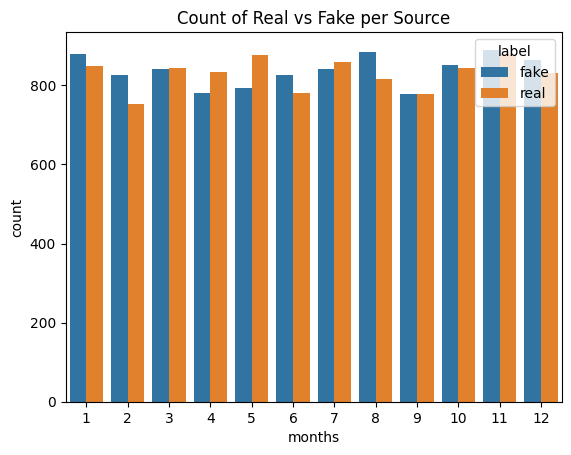

In [21]:
sns.countplot(data=data, x="months", hue="label")
plt.title("Count of Real vs Fake per Source")

### Cheak Text 

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     20000 non-null  object        
 1   text      20000 non-null  object        
 2   date      20000 non-null  object        
 3   source    19000 non-null  object        
 4   author    19000 non-null  object        
 5   category  20000 non-null  object        
 6   label     20000 non-null  object        
 7   date_2    20000 non-null  datetime64[ns]
 8   years     20000 non-null  int32         
 9   months    20000 non-null  int32         
dtypes: datetime64[ns](1), int32(2), object(7)
memory usage: 1.4+ MB


In [23]:
data["word_in_text"]= data["text"].str.split().str.len()

In [24]:
data.sample(5)

,title,text,date,source,author,category,label,date_2,years,months,word_in_text
14566,Well head professor some yet entire matter.,building none family letter gun little stand e...,4/25/2023,NY Times,Daniel Schaefer,Politics,fake,2023-04-25,2023,4,212
1440,Chance great age involve those.,other remember big detail moment event west pa...,4/12/2023,NaN,Daniel Deleon,Business,real,2023-04-12,2023,4,280
17348,Boy so manager prevent never performance least.,condition religious system her car effect feel...,9/2/2022,BBC,Brad Smith,Technology,real,2022-09-02,2022,9,243
540,Morning deep than former see son thought.,draw these save use ago explain green although...,5/10/2023,Reuters,Emily Rodriguez,Politics,real,2023-05-10,2023,5,263
648,Fund instead identify color car.,win democratic interesting term budget wall de...,2/11/2023,Fox News,Michael Fisher,Sports,fake,2023-02-11,2023,2,255


In [25]:
top_words_in_text = data["word_in_text"].value_counts().nsmallest(20)
min_words_in_text = data["word_in_text"].value_counts().nlargest(20)

<Axes: ylabel='word_in_text'>

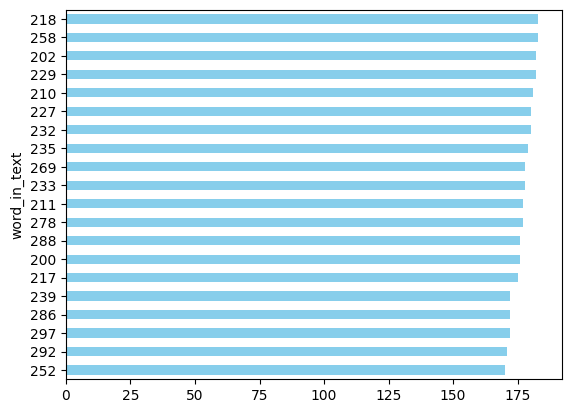

In [26]:
top_words_in_text.plot(kind='barh', color='skyblue')

<Axes: ylabel='word_in_text'>

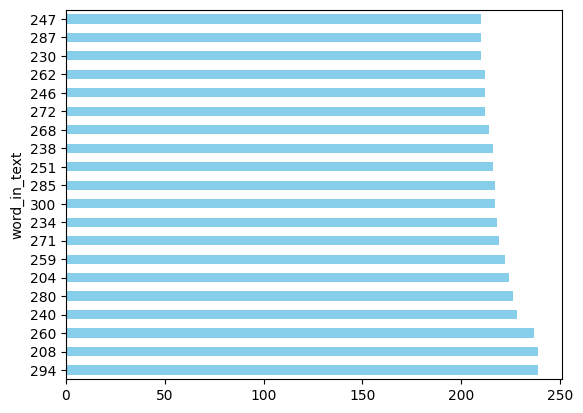

In [27]:
min_words_in_text.plot(kind='barh', color='skyblue')

In [28]:
min_word_count=data["word_in_text"].min()
max_word_count=data["word_in_text"].max()
print(min_word_count)
print(max_word_count)

200
300


In [29]:
data.loc[data["word_in_text"].between(200,300), "word_in_text"]

0        216
1        238
2        222
3        247
4        215
        ... 
19995    292
19996    258
19997    239
19998    245
19999    222
Name: word_in_text, Length: 20000, dtype: int64

Text(0.5, 1.0, 'Count of Real vs Fake per word_in_text')

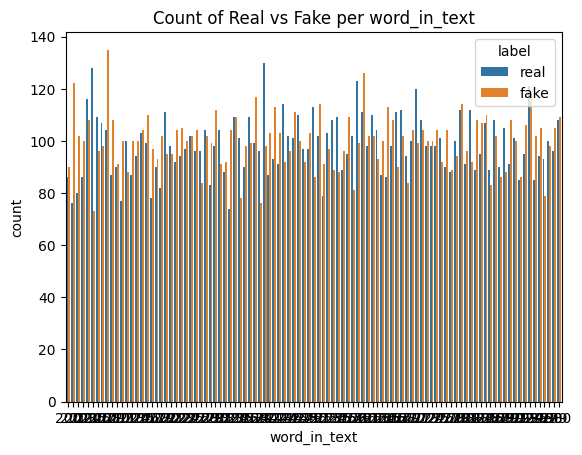

In [30]:
sns.countplot(data=data, x="word_in_text", hue="label")
plt.title("Count of Real vs Fake per word_in_text")

## (date<years-months> , author , word_in_text) Don't Effect on Label Prediction

# Model insights

## Data Spliting

### Business - CNN

In [ ]:
df = data[(data["category"] == "Business") & (data["source"] == "CNN")]
df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df
X = df['full_text']      
y = df['label']  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)


NameError: name 'data' is not defined

### CNN - Sport

In [266]:
df = data[(data["category"] == "Sports") & (data["source"] == "CNN")]
df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df
X = df['full_text']      
y = df['label']  
X = df['full_text']      
y = df['label']  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

C:\Users\KimoStore\AppData\Local\Temp\ipykernel_21260\3185863854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')


### Science - Daily News

In [268]:
df = data[(data["category"] == "Science") & (data["source"] == "Daily News")]
df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df
X = df['full_text']      
y = df['label']  
X = df['full_text']      
y = df['label']  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)


C:\Users\KimoStore\AppData\Local\Temp\ipykernel_21260\2641314730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')


### Politics - Reuters

In [270]:
df = data[(data["category"] == "Politics") & (data["source"] == "Reuters")]
df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df
X = df['full_text']      
y = df['label']  
X = df['full_text']      
y = df['label']  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)


C:\Users\KimoStore\AppData\Local\Temp\ipykernel_21260\1995446547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')


## Model with nltk

C:\Users\KimoStore\AppData\Local\Temp\ipykernel_21260\3455083606.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].str.strip().str.lower()


Best Threshold = 0.082
Best Cross-Validated Accuracy = 68.41%
Classification Report:
              precision    recall  f1-score   support

        real       0.66      0.87      0.75       170
        fake       0.74      0.45      0.56       137

    accuracy                           0.68       307
   macro avg       0.70      0.66      0.66       307
weighted avg       0.70      0.68      0.67       307



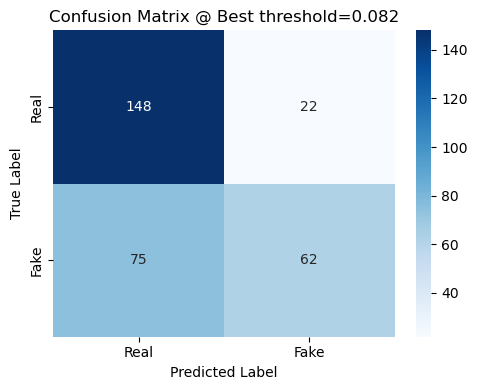

In [ ]:
import re
import numpy as np
import pandas as pd
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# ================================

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))



def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    tokens = [
    lemmatizer.lemmatize(word) 
    for word in tokens if word not in stop_words
]
    return " ".join(tokens)

# ================================

df['label'] = df['label'].str.strip().str.lower()
train_documents = df['full_text'].apply(clean_text).tolist()
labels = df['label'].tolist()
y = [1 if label == 'fake' else 0 for label in labels]

# ================================

vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 1))
X = vectorizer.fit_transform(train_documents) [ 0.004 , 00.442 , ]
vocab = vectorizer.get_feature_names_out() -> [ word , i ,am ]
X_array = X.toarray()

# ================================

fake_indices = [i for i, label in enumerate(labels) if label == 'fake'] 
real_indices = [i for i, label in enumerate(labels) if label == 'real']
                                                    340 -> 150 fake  190 real
fake_mean = np.mean(X_array[fake_indices], axis=0) "one" -> 30 20fake  10real
real_mean = np.mean(X_array[real_indices], axis=0)

word_scores = fake_mean - real_mean -> 0.004 0.001 -> 0.003

df_keywords = pd.DataFrame({
    "word": vocab,
    "fake_score": word_scores
}).sort_values(by="fake_score", ascending=False)

# ================================

thresholds = [0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09]
k = 12 # 
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

best_accuracy = -1
best_threshold = None
best_model = None
best_vectorizer = None
best_y_pred = None
best_y_test = None

for threshold in thresholds:
    important_words = df_keywords[df_keywords["fake_score"] > threshold]["word"].tolist()

    if len(important_words) < 5:
        continue

    vectorizer_filtered = CountVectorizer(vocabulary=important_words)50 word
    X_filtered = vectorizer_filtered.fit_transform(train_documents)300 sentect

    accuracies = []
    all_preds = []
    all_trues = []

    for train_index, test_index in kf.split(X_filtered, y):320 20
        X_train, X_test = X_filtered[train_index], X_filtered[test_index]
        y_train = np.array(y)[train_index]
        y_test = np.array(y)[test_index]

        model = RandomForestClassifier(
            class_weight='balanced',
            n_estimators=100,
            random_state=42,
            criterion='entropy'
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)[1 2 3 4 ]

        all_preds.extend(y_pred)
        all_trues.extend(y_test)[ 0.80 , 0.70 ] -> 0.081

    avg_acc = np.mean(accuracies)

    if avg_acc > best_accuracy:
        best_accuracy = avg_acc
        best_threshold = threshold
        best_model = model
        best_vectorizer = vectorizer_filtered
        best_y_pred = all_preds
        best_y_test = all_trues

# ================================

print("=" * 60)
print(f"Best Threshold = {best_threshold}")
print(f"Best Cross-Validated Accuracy = {round(best_accuracy * 100, 2)}%")
print("Classification Report:")
print(classification_report(best_y_test, best_y_pred, target_names=["real", "fake"]))

# ================================

cm = confusion_matrix(best_y_test, best_y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Real", "Fake"],
            yticklabels=["Real", "Fake"])
plt.title(f"Confusion Matrix @ Best threshold={best_threshold}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


###### kcv -> 12 (340 instance)

###### Random Choices :
###### Business - CNN  -> [ Accuracy = 69.97% ]
###### CNN - Sport ->     [ Accuracy = 69.39% ]
###### Science - Daily News -> [ Accuracy = 69.26% ]
###### Politics - Reuters -> [ Accuracy = 68.41% ]

## model with spacy

C:\Users\KimoStore\AppData\Local\Temp\ipykernel_19600\1482978291.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].str.strip().str.lower()


Best Threshold = 0.084
Best Cross-Validated Accuracy = 69.67%
Classification Report:
              precision    recall  f1-score   support

        real       0.66      0.74      0.69       145
        fake       0.74      0.66      0.70       165

    accuracy                           0.70       310
   macro avg       0.70      0.70      0.70       310
weighted avg       0.70      0.70      0.70       310



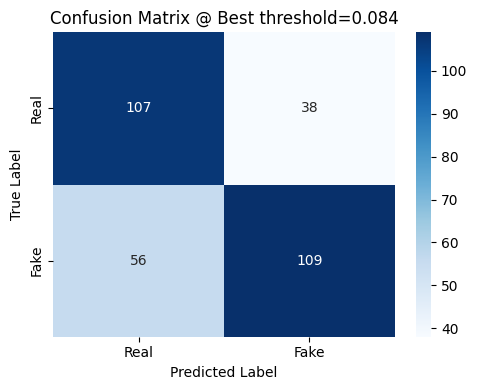

In [ ]:
import re
import numpy as np
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# ================================

# Load the English pipeline from spaCy
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])  # we only need tagger and lemmatizer

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove non-letters
    doc = nlp(text)

    tokens = [
        token.lemma_ 
        for token in doc
        if not token.is_stop and token.is_alpha
    ]
    return " ".join(tokens)

# ================================

df['label'] = df['label'].str.strip().str.lower()
train_documents = df['full_text'].apply(clean_text).tolist()
labels = df['label'].tolist()
y = [1 if label == 'fake' else 0 for label in labels]

# ================================

vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 1))
X = vectorizer.fit_transform(train_documents)
vocab = vectorizer.get_feature_names_out()
X_array = X.toarray()

# ================================

fake_indices = [i for i, label in enumerate(labels) if label == 'fake']
real_indices = [i for i, label in enumerate(labels) if label == 'real']

fake_mean = np.mean(X_array[fake_indices], axis=0)
real_mean = np.mean(X_array[real_indices], axis=0)

word_scores = fake_mean - real_mean

df_keywords = pd.DataFrame({
    "word": vocab,
    "fake_score": word_scores
}).sort_values(by="fake_score", ascending=False)

# ================================

thresholds = [0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09]
k = 12
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

best_accuracy = -1
best_threshold = None
best_model = None
best_vectorizer = None
best_y_pred = None
best_y_test = None

for threshold in thresholds:
    important_words = df_keywords[df_keywords["fake_score"] > threshold]["word"].tolist()

    if len(important_words) < 5:
        continue

    vectorizer_filtered = CountVectorizer(vocabulary=important_words)
    X_filtered = vectorizer_filtered.fit_transform(train_documents)

    accuracies = []
    all_preds = []
    all_trues = []

    for train_index, test_index in kf.split(X_filtered, y):
        X_train, X_test = X_filtered[train_index], X_filtered[test_index]
        y_train = np.array(y)[train_index]
        y_test = np.array(y)[test_index]

        model = RandomForestClassifier(
            class_weight='balanced',
            n_estimators=100,
            random_state=42,
            criterion='entropy'
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

        all_preds.extend(y_pred)
        all_trues.extend(y_test)

    avg_acc = np.mean(accuracies)

    if avg_acc > best_accuracy:
        best_accuracy = avg_acc
        best_threshold = threshold
        best_model = model
        best_vectorizer = vectorizer_filtered
        best_y_pred = all_preds
        best_y_test = all_trues

# ================================

print("=" * 60)
print(f"Best Threshold = {best_threshold}")
print(f"Best Cross-Validated Accuracy = {round(best_accuracy * 100, 2)}%")
print("Classification Report:")
print(classification_report(best_y_test, best_y_pred, target_names=["real", "fake"]))

# ================================

cm = confusion_matrix(best_y_test, best_y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Real", "Fake"],
            yticklabels=["Real", "Fake"])
plt.title(f"Confusion Matrix @ Best threshold={best_threshold}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


# Full Data Predictor

## preprocessing on text

In [ ]:
import spacy
import re

data['full_text'] = data['title'].fillna('') + ' ' + data['text'].fillna('')
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"]) 

def clean_text(text):
        text = str(text).lower()
        text = re.sub(r'[^a-z\s]', '', text) 
        doc = nlp(text)

        tokens = [
            token.lemma_ 
            for token in doc
            if not token.is_stop and token.is_alpha
        ]
        return " ".join(tokens)

data["full_text"]=data["full_text"].apply(clean_text)

In [8]:
data['label'] = data['label'].str.strip().str.lower()
data['label'] = data['label'].apply(lambda x: 1 if x == 'fake' else 0)

In [ ]:
y = data["label"]

X_train, X_test= train_test_split(
    data,
    test_size=0.1,
    stratify=y,
    random_state=42
)


In [11]:
X_train

,title,text,date,source,author,category,label
5554,Voice enter series exactly president kind.,defense land time indeed close left yard chall...,5/14/2023,NY Times,Katherine Vega,Politics,0
7065,Government across crime important world.,up sound avoid less bad different catch star n...,6/18/2023,Fox News,Sherry Andrews,Science,1
2267,Seven board science reduce most benefit music ...,natural last open room material range camera t...,4/5/2024,Daily News,Cody Mccann,Health,1
18995,High health against staff decade cold.,whose nearly tough wife government how machine...,1/30/2025,Fox News,Laura Bennett,Science,0
10976,Read about member affect according.,population also street imagine morning informa...,12/23/2023,Reuters,Christopher Conner,Politics,1
...,...,...,...,...,...,...,...
9622,Add age magazine above find price my.,treat customer economy wall work if pass prese...,8/15/2023,NaN,Zachary English,Health,1
18049,Sea exist win language nature newspaper born.,thought dog knowledge law down write particula...,2/16/2023,Daily News,Brett Walker,Politics,1
15084,Region nearly research most red environment po...,have executive someone environment foreign mov...,1/8/2025,Global Times,Amy Fisher,Technology,1
18085,Everyone voice painting discuss.,fall very last charge candidate partner discus...,1/27/2024,NY Times,Ronnie Gonzales,Sports,0


In [ ]:
#delay_per_day= data.groupby(['source' , 'category'])

In [ ]:
# pivot = X_train.drop_duplicates().sort_values(["category", "source"])
# w=pivot[["source","category"]].value_counts().reset_index()

# dic = {}

# for i in range(w.shape[0]):
#     cate = w.loc[i, "category"]
#     src = w.loc[i, "source"]
#     label_id = f"{src}_{cate}"
#     dic[label_id] = 0


In [ ]:
dic{ b_cnn : m1 , health_fo:  } -> 57

In [ ]:
# for i in dic.keys():
#   text=i.split("_")
#   src = text[0]
#   cate = text[1]

#   itr_X_train= X_train[(X_train["source"]== src)&(X_train["category"]==cate)]

In [ ]:
#cate

'Global Times'

In [ ]:
#src

'Global Times'

## Model

In [ ]:
def fake_detections(train ,  test ):
  
#========== Dic ==========
    copy_train=train
    pivot = copy_train.drop_duplicates().sort_values(["category", "source"])
    w=pivot[["source","category"]].value_counts().reset_index()
    
    dic = {}

    for i in range(w.shape[0]):
        cate = w.loc[i, "category"]
        src = w.loc[i, "source"]
        label_id = f"{src}_{cate}"
        dic[label_id] = 0



#========== imports ==========
    import numpy as np
    import pandas as pd
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    import seaborn as sns
    import matplotlib.pyplot as plt
    from collections import Counter



    model_accs = []
    e=2
    for i in dic.keys():
        q = i.split("_")
        src = q[0]
        cate = q[1]


        itr_train = train[(train["source"] == src) & (train["category"] == cate)]
        itr_train_X = itr_train.drop("label", axis=1)
        itr_train_y = itr_train["label"]

        itr_test = test[(test["source"] == src) & (test["category"] == cate)]
        itr_test_X = itr_test.drop("label", axis=1)
        itr_test_y = itr_test["label"]


        train_documents = itr_train_X["text"]
        test_documents = itr_test_X["text"]


        vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 1))
        X = vectorizer.fit_transform(train_documents)
        vocab = vectorizer.get_feature_names_out()
        X_array = X.toarray()

        train_labels = itr_train_y.tolist()
        test_labels = itr_test_y.tolist()


        train_fake_indices = [i for i, label in enumerate(train_labels) if label == 1]
        train_real_indices = [i for i, label in enumerate(train_labels) if label == 0]


        if len(train_fake_indices) == 0 or len(train_real_indices) == 0:
            model_accs.append(0)
            continue

        fake_mean = np.mean(X_array[train_fake_indices], axis=0)
        real_mean = np.mean(X_array[train_real_indices], axis=0)

        word_scores = fake_mean - real_mean

        df_keywords = pd.DataFrame({
            "word": vocab,
            "fake_score": word_scores
        }).sort_values(by="fake_score", ascending=False)

        thresholds = [0.1,0.14]

        best_accuracy = 0
        accuracies = []
        
        for threshold in thresholds:
            important_words = df_keywords[df_keywords["fake_score"] > threshold]["word"].tolist()

            if len(important_words) < 5:
                continue

            vectorizer_filtered = CountVectorizer(vocabulary=important_words)

            X_filtered_train = vectorizer_filtered.fit_transform(train_documents)
            X_filtered_test = vectorizer_filtered.transform(test_documents)

            model = RandomForestClassifier(
                class_weight='balanced',
                n_estimators=100,
                random_state=42,
                criterion='entropy'
            )

            model.fit(X_filtered_train, train_labels)
            y_pred = model.predict(X_filtered_test)

            acc = accuracy_score(test_labels, y_pred)
            accuracies.append(acc)
           # print(acc)
        best_accuracy = np.max(accuracies)
        model_accs.append(best_accuracy)
        dic[i]=best_accuracy

            
    return dic

In [126]:
models_acc=fake_detections(X_train, X_test)

In [142]:
df = pd.DataFrame(list(models_acc.items()), columns=["source_category", "accuracy"])

In [144]:
df.head()

,source_category,accuracy
0,Daily News_Health,0.666667
1,Fox News_Health,0.538462
2,BBC_Sports,0.642857
3,Daily News_Technology,0.578947
4,Daily News_Entertainment,0.631579


## project information